In [2]:
import matplotlib.pyplot as plt; plt.rcParams['figure.dpi'] = 250
import numpy as np
import torch 

# Plotting the loss over the epochs

In [3]:
path_loss = 'C:\\Users\\noedi\\Desktop\\Stage été 2022\\Code stage\\Vae Galaxies\\Data\weights + losses\\galaxy_w_redshift\\vae\\z32_beta0.1_loss.pt'

step_train_loss, step_val_loss, mse, kl, hyperparameters = torch.load(path_loss)
batch_size = hyperparameters["batch size"]
num_epochs = hyperparameters["epochs"]
beta = hyperparameters["beta"]
lr = hyperparameters["learning rate"]
z_dim = hyperparameters["z_dim"]

In [4]:
# Transforming the value of the loss per iteration into a mean value of loss per epoch 
train_iterations_per_epoch = len(step_train_loss)//num_epochs
val_iterations_per_epoch = len(step_val_loss)//num_epochs
epochs = [k for k in range(1, num_epochs + 1)]

train_loss_epoch = []
val_loss_epoch = []
mse_epoch = []
kl_epoch = []

for i, j in enumerate(epochs):
    avg_train_loss = step_train_loss[i*train_iterations_per_epoch: j*train_iterations_per_epoch].mean() 
    train_loss_epoch.append(avg_train_loss)
    
    avg_val_loss = step_val_loss[i*val_iterations_per_epoch : j*val_iterations_per_epoch].mean()
    val_loss_epoch.append(avg_val_loss)

    avg_mse = mse[i*train_iterations_per_epoch: j*train_iterations_per_epoch].mean()
    mse_epoch.append(avg_mse)

    avg_kl = kl[i*train_iterations_per_epoch: j*train_iterations_per_epoch].mean()
    kl_epoch.append(avg_kl)


Text(0.5, 1.0, 'Training for 100 epochs, $\\beta$=0.1, learning rate = 0.001, $z_{dim}$= 32')

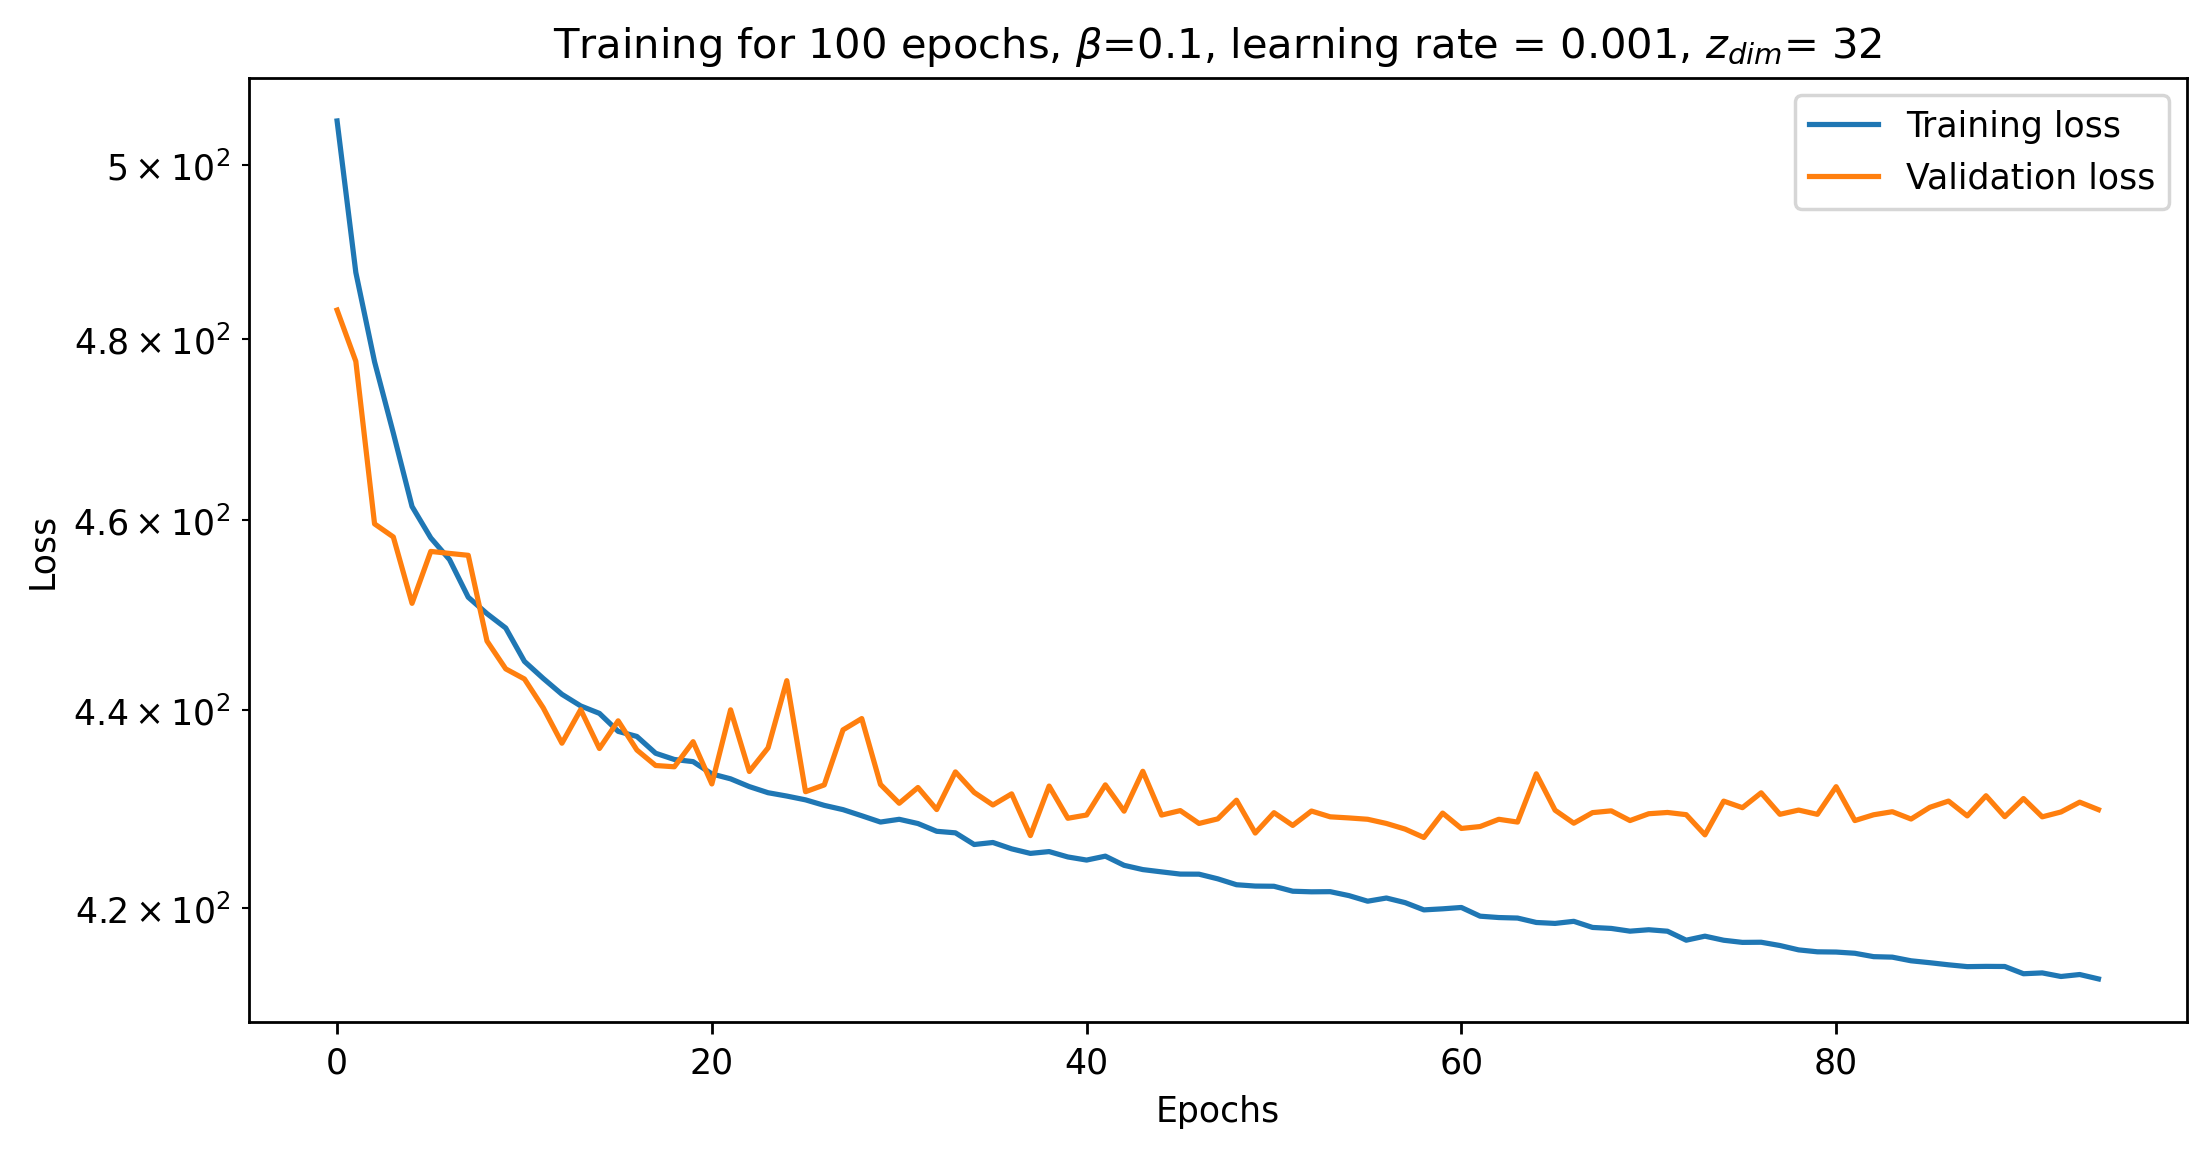

In [5]:
figure = plt.figure(figsize=(10, 5))
# No plotting of the beginning of the lists to see better where the validation loss stops decreasing 
plt.plot(train_loss_epoch[5:], label = 'Training loss')  
plt.plot(val_loss_epoch[5:], label = 'Validation loss')
plt.yscale('log')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title(f'Training for {num_epochs} epochs, '+ r'$\beta$'+f'={beta}, learning rate = {lr}, ' r'$z_{dim}$'+ f'= {z_dim}')


# Plotting the MSE term and the KL term
It can be interesting to see how the $\beta$ value (or its behaviour i.e. if you make it increase over the epochs from 0.1 to 1) is influencing the general loss. Since: $$ L = \text{MSE}(\boldsymbol{x}, \boldsymbol{\hat{x}}) - \beta D_{KL}(q_\phi(\boldsymbol{z|x})||p(\boldsymbol{z}))$$
with $p(\boldsymbol{z})$ a Gaussian $\mathcal{N}(z;\boldsymbol{0}, \textbf{I})$ and  $q_\phi(\boldsymbol{z|x})$, a distribution we assume to be a Gaussian $ \mathcal{N}(z;\boldsymbol{\mu}, \boldsymbol{\sigma}^2\textbf{I})$.

The greater $\beta$ is, the greater the KL term influences the loss, meaning that the recognition model $q_\phi(\boldsymbol{z|x})$ is close to a Gaussian $\mathcal{N}(\boldsymbol{0}, \textbf{I})$.  
If $\beta$ is small, the recognition model distribution will be less close to a Gaussian $\mathcal{N}(\boldsymbol{0}, \textbf{I})$ (the neural network update its parameters to minimize the MSE term since the KL term is already low and has a small impact on the loss)

Plotting the KL term and the MSE term separately allows to be aware of this behaviour in $\beta$-vaes


Text(0.5, 1.0, 'Training for 100 epochs, $\\beta$=0.1, learning rate = 0.001, $z_{dim}$= 32')

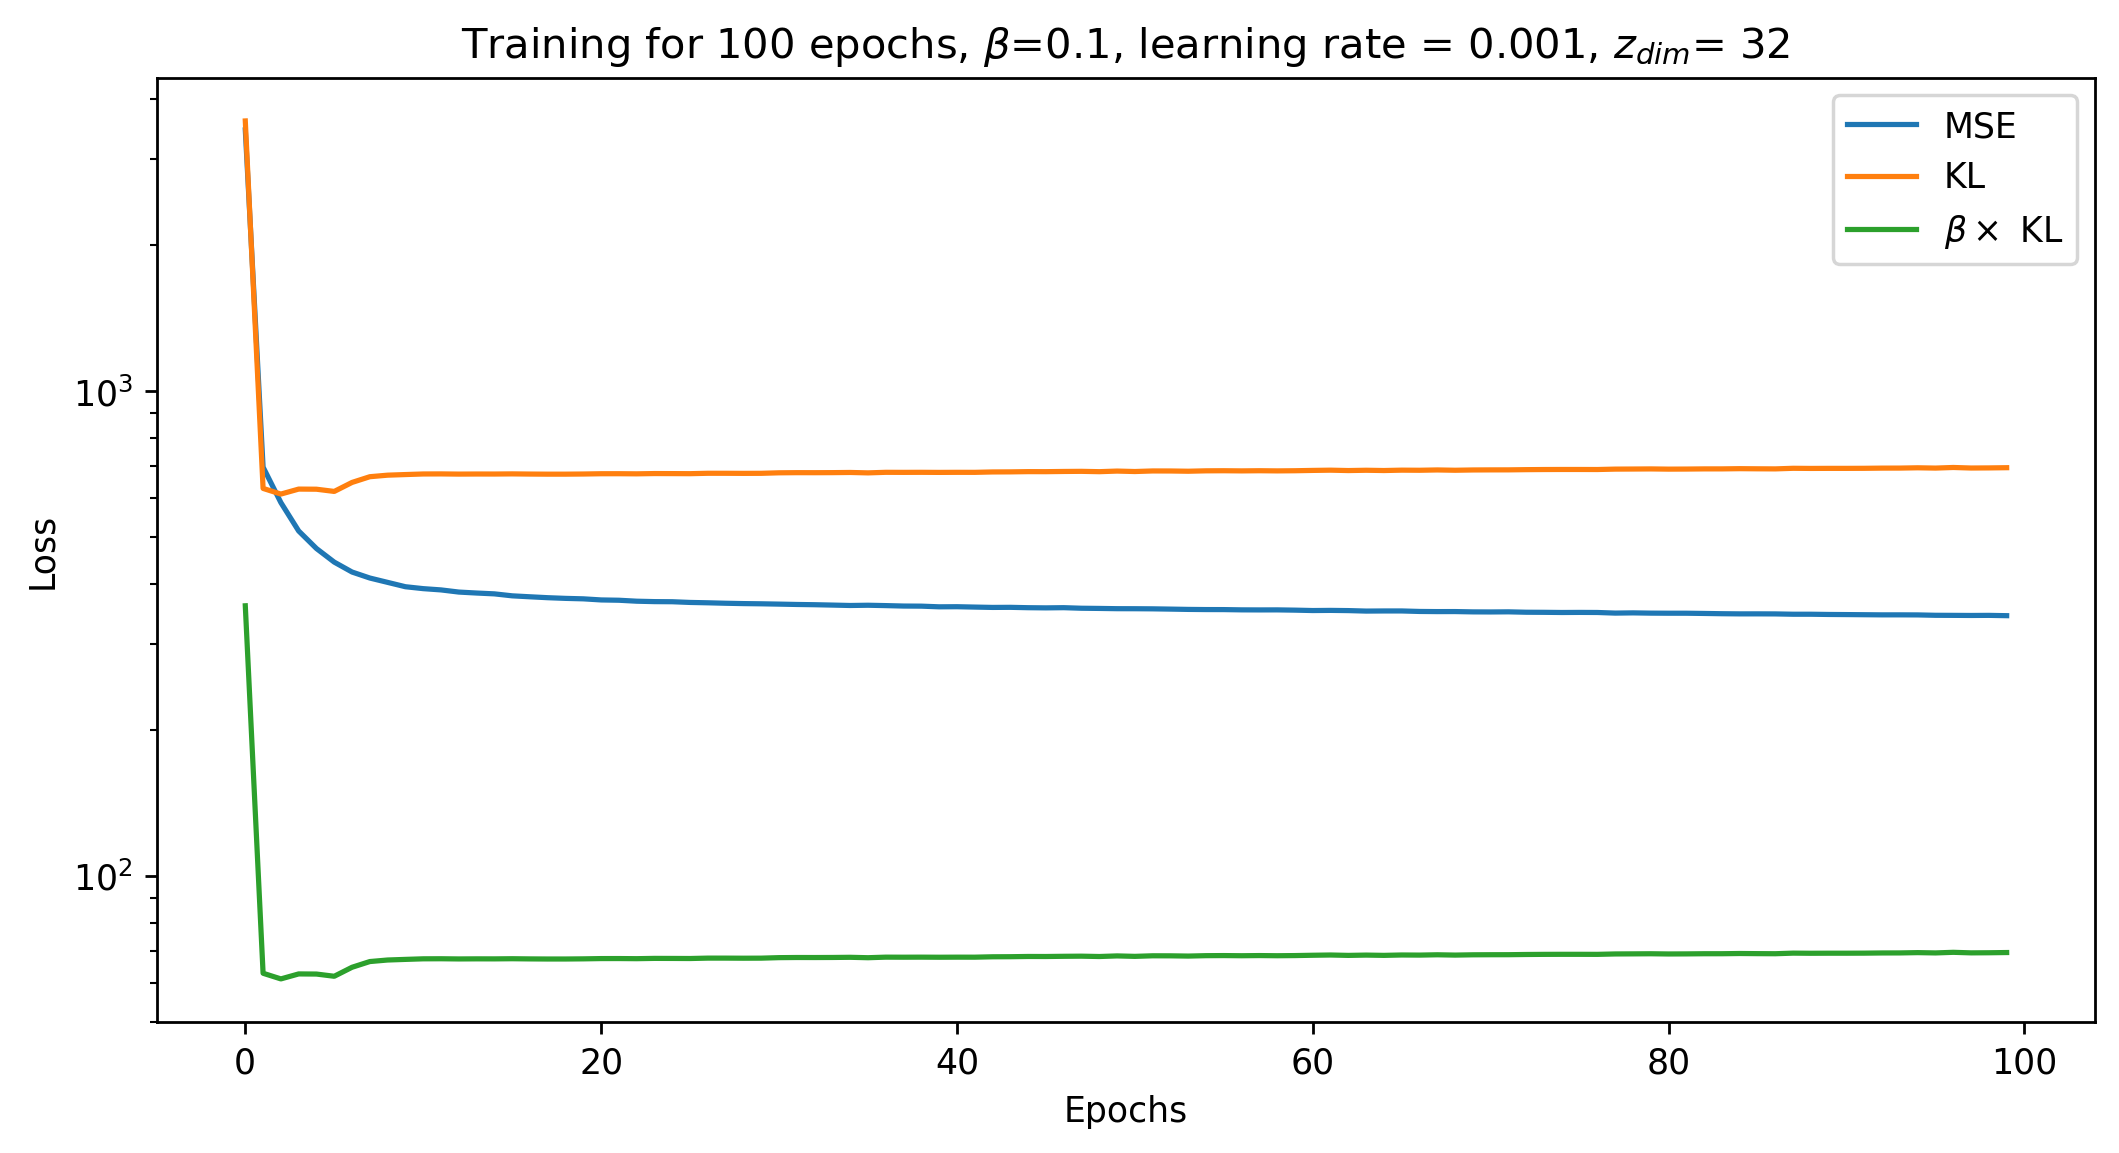

In [9]:
# The mse and kl terms plotted are both part of the training loss (not the validation one)
figure = plt.figure(figsize=(10, 5))
plt.plot(mse_epoch[:], label = 'MSE')
plt.plot(kl_epoch[:], label = 'KL')
plt.plot(beta*np.array(kl_epoch)[:], label = r'$\beta\times$ KL')
plt.yscale('log')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title(f'Training for {num_epochs} epochs, '+ r'$\beta$'+f'={beta}, learning rate = {lr}, ' r'$z_{dim}$'+ f'= {z_dim}')